# Assignment 4 (15 points)

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. 

Use python 3.
Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de until 5.7.2017 (midnight CET). 
Subject of email: "CSS2017 Ass4"
Filename: firstname_lastname_ass4.ipynb



### Simple Contagion: SIR Model (5 points)

Create 3 different network topologies (checkout different network generators [1]) and spread a disease in these networks using the SIR model (which you have to implement yourself; dont use packages like nepidemix). Compare your results with the results from spreading the disease in a fully connected ndtwork.
How do the different network topolgies impact the results?

At the beginning all nodes are susceptible and one randomly picked node is infected.
Choose different infection probabilities and death probabilities.
Plot the proportion of nodes in each state after k steps. 


[1] https://networkx.github.io/documentation/development/reference/generators.html

Try with 1000 nodes

In [82]:
# %pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as NX
import random as RD

from numpy.random import choice

import time
from collections import defaultdict
import copy


def init_fully_connected_network(n): 
    global g
    g = NX.random_regular_graph(n-1, n) 
    init_network_state()
    
def init_small_world(n, k, p): 
    global g
    g = NX.watts_strogatz_graph(n, k, p) 
    init_network_state()
       
def init_random_network(n, p): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.erdos_renyi_graph(n, p)
    init_network_state()

def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"

    # select one node randomly and infect it    
    random_node_id = RD.choice(g.nodes())
    g.node[random_node_id]["state"] = "infected"
    g.node[random_node_id]["days"] = beta
  
    


def draw():
    #PL.cla()
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        elif g.node[nd]["state"] == "recovered":
            colors[nd] = "green"
        else:                       # Susceptible
            colors[nd] = "blue"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

alpha = 0.01
beta = 0.1

infected = 1
susceptible = 0
recovered = 0

    
def stepSIR():
    global g
    global infected, susceptible, recovered
    for node in g.nodes():
        if g.node[node]["state"] == "infected":
            if g.node[node]['days'] >= 0.91:
                g.node[node]["state"] = "recovered"
                infected-=1
                recovered+=1
            else:
                g.node[node]['days'] += beta  
                for nod in g.neighbors(node):
                    if g.node[nod]['state'] == "susceptible" and infect():
                        g.node[nod]['state'] = "infected"
                        g.node[nod]['days'] = beta
                        infected+=1
                        susceptible-=1
                        
def runSIR():
    global g
    global infected, susceptible, recovered
    infected = 1
    susceptible = len(g.nodes())
    recovered = 0
    num_iter = 0
    infected_ = []
    susceptible_ = []
    recovered_ = []
    while(infected>0 and susceptible>0 and recovered<len(g.nodes())):
        stepSIR()
        infected_.append(infected)
        susceptible_.append(susceptible)
        recovered_.append(recovered)
#         draw()
#         time.sleep(1)
        num_iter+=1
    print(infected)
    print(susceptible)
    print(recovered)
    print(num_iter)

In [83]:
def infect():
    draw = choice([0, 1], 1, p=[1-alpha, alpha])
    return draw[0]

In [84]:
init_fully_connected_network(100)

0
1
100
19


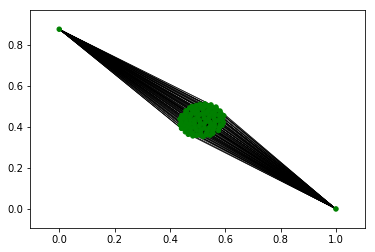

In [85]:
runSIR()
draw()

In [86]:
init_random_network(1000, 0.3)

0
1
1000
15


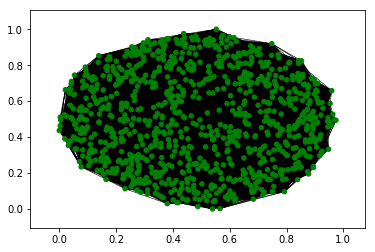

In [87]:
runSIR()
draw()

In [88]:
init_small_world(100, 10, 0.4)

0
99
2
12


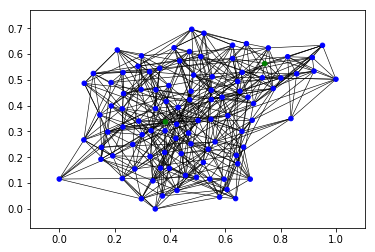

In [89]:
runSIR()
draw()


### Complex Contagion: Granovetter's Linear Treshold Model (5 points)


Implement Granovetter's Linear Treshold Model. Assume that the thresholds of people are normally distributed. Use you code to explore complex contagion in different network topologies (look at network generators [1]). 
Create at least 3 different network topologies. 
Interpret and discuss your results.


[1] https://networkx.github.io/documentation/development/reference/generators.html


### Axelrod Model (5 points)

Implement Axelrods  model of cultural diffusion.
Create a network and randomly assign a cultural vector to each node.
Implement the dynamic process as describe in: http://www-personal.umich.edu/~axe/research/Dissemination.pdf
Try different number of features and traits per feature.
Make a plot that describes the macro-state of the system (e.g., depict the number of groups that share a culture. At the beginning each node has it's own culture')?
